[2, 3, 4, 20, 69, 120, 22, 5, 9, 5]
[[ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  2.  3.  9.  5.  0.  1.  0.]
 [ 1.  0.  1.  7. 18. 34.  6.  1.  1.  0.]
 [ 1.  0.  0.  9. 35. 62.  8.  1.  3.  1.]
 [ 0.  0.  0.  2.  9.  8.  1.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  3.  0.  0.  0.  2.]
 [ 0.  0.  1.  0.  3.  1.  0.  1.  2.  1.]
 [ 0.  2.  1.  0.  0.  0.  1.  0.  0.  0.]]
[[0.     0.     0.     0.     0.     0.5    0.5    0.     0.     0.    ]
 [0.     0.3333 0.     0.     0.     0.     0.     0.     0.6667 0.    ]
 [0.     0.     0.25   0.     0.25   0.25   0.     0.25   0.     0.    ]
 [0.     0.     0.     0.1    0.15   0.45   0.25   0.     0.05   0.    ]
 [0.0145 0.     0.0145 0.1014 0.2609 0.4928 0.087  0.0145 0.0145 0.    ]
 [0.0083 0.     0.     0.075  0.2917 0.5167 0.0667 0.0083 0.025  0.0083]
 [0.     0.     0.     0.0909 0.4091 0.3636 0.0455 0.0455 0.     0.0455]
 [0.     0.     0.    

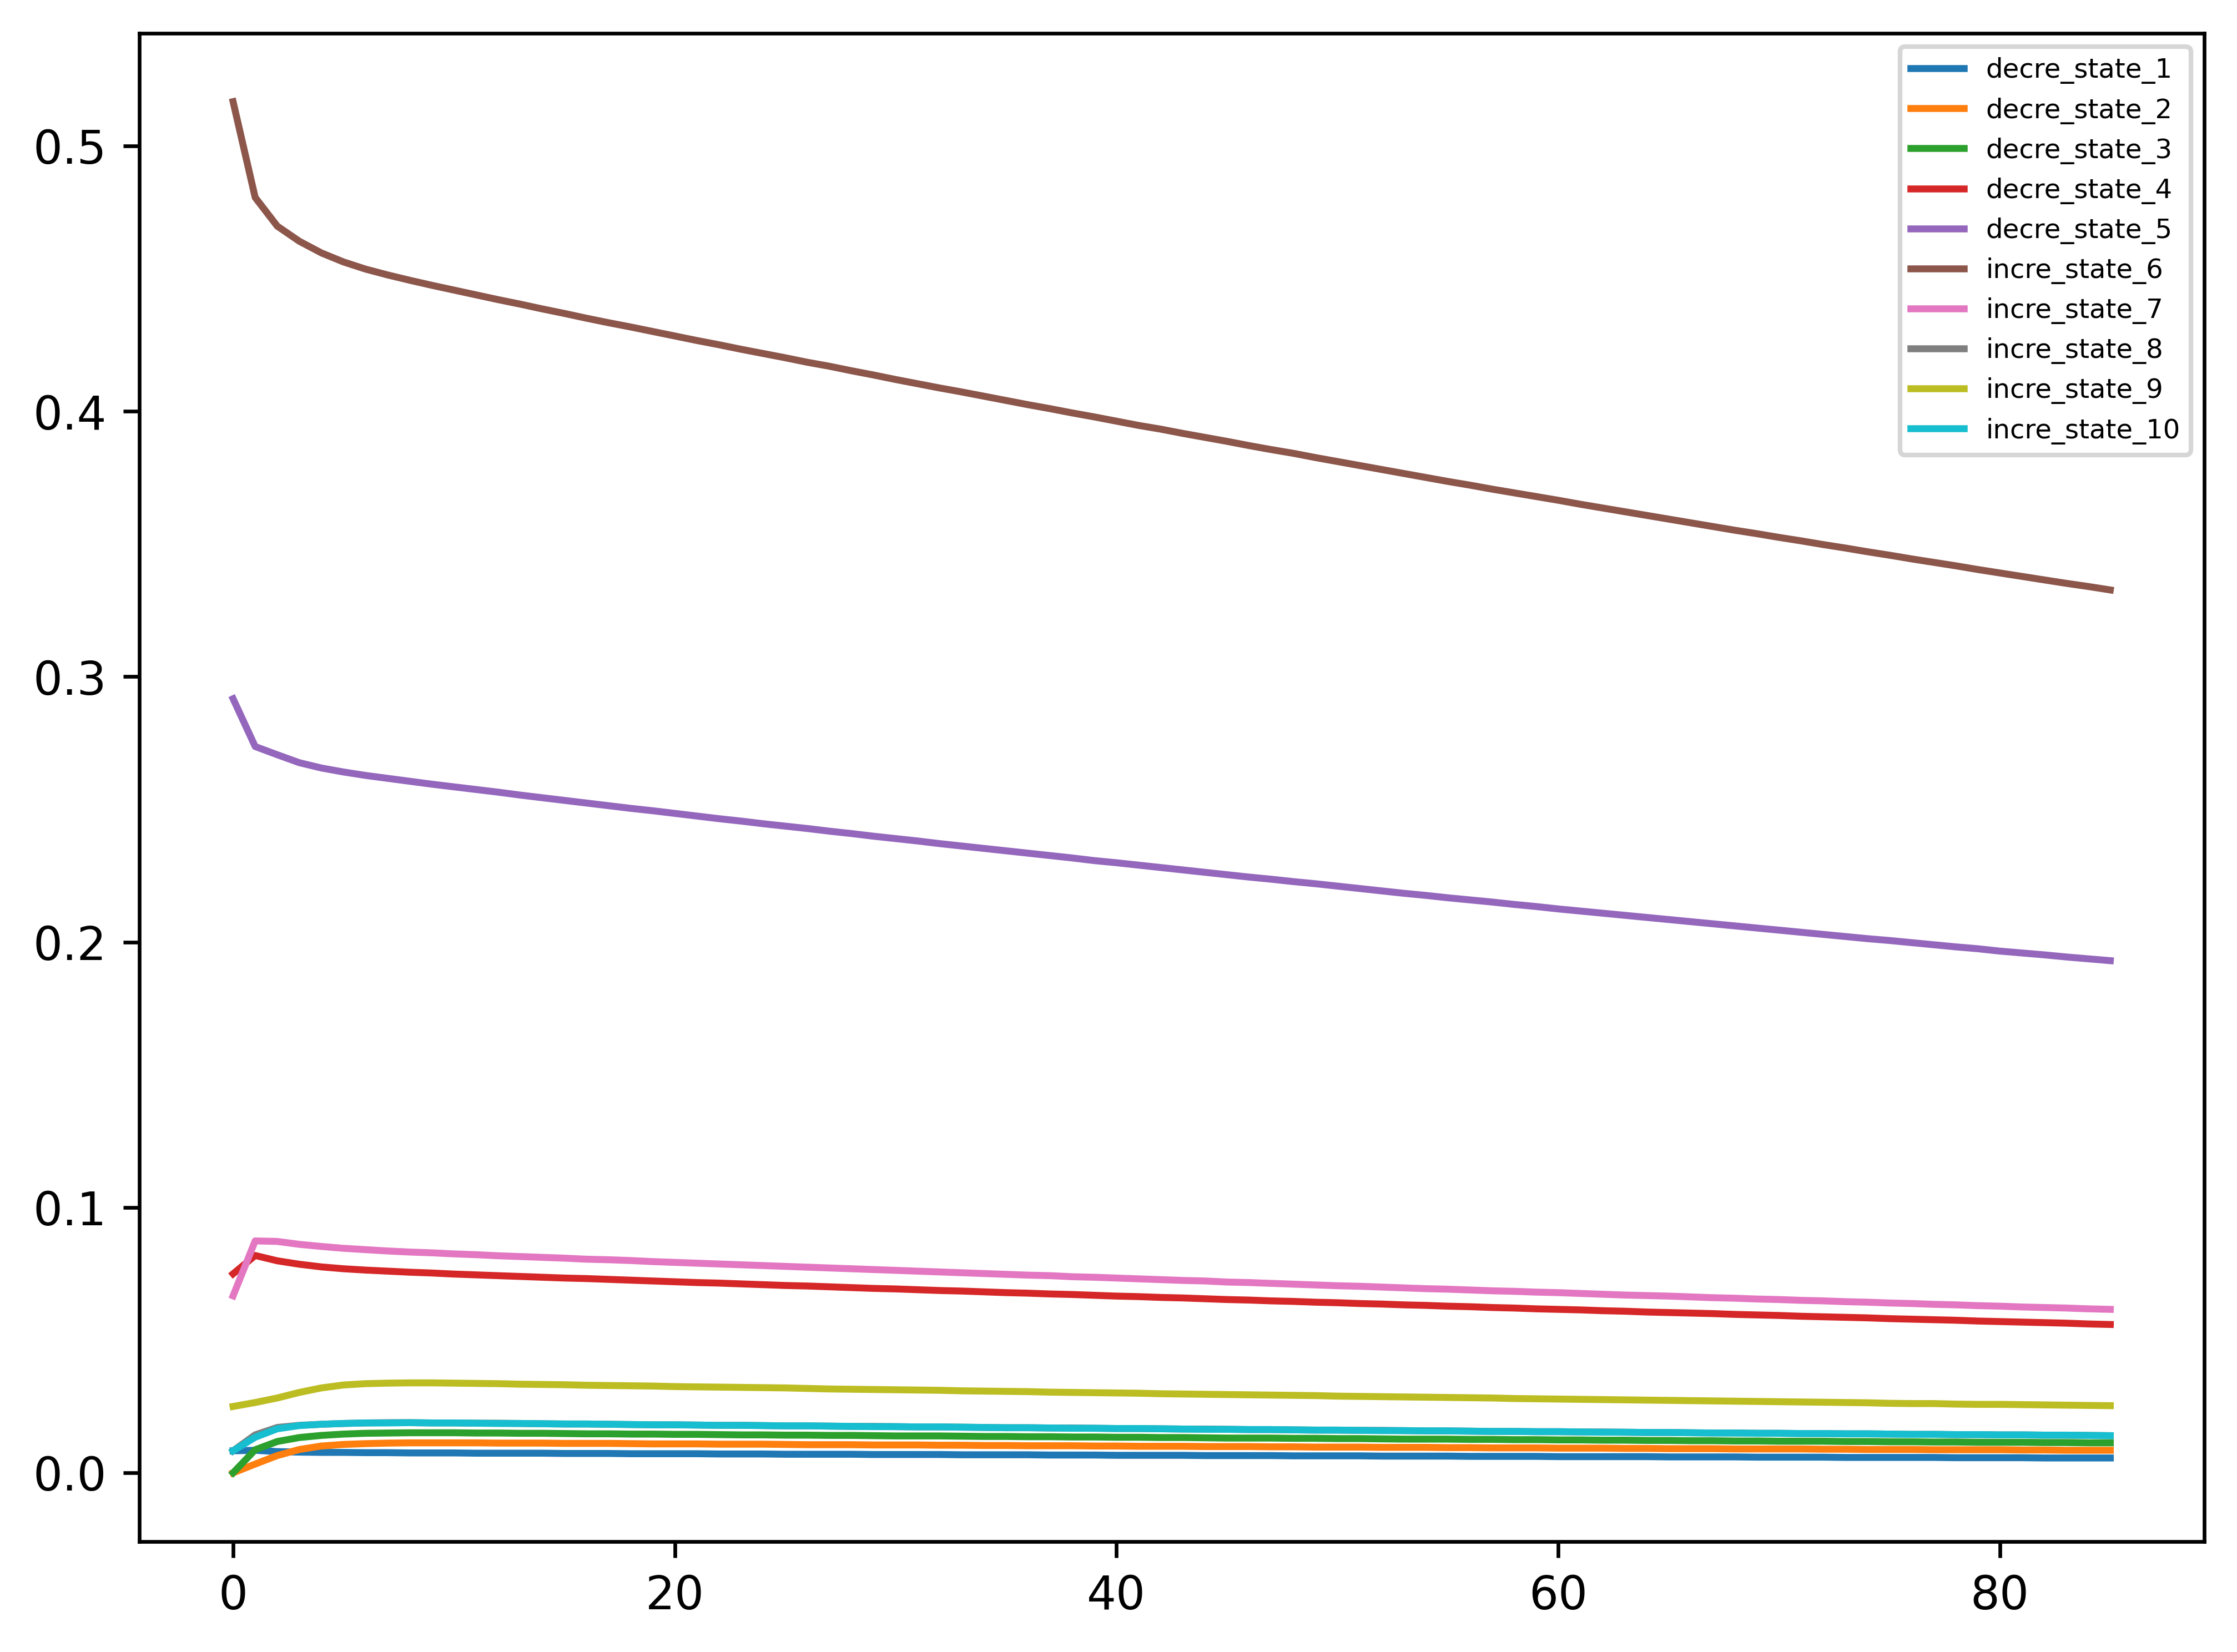

PermissionError: [Errno 13] Permission denied: 'D:\\2020fall课程\\LGT6006博弈论\\term_paper1\\ChinaBank_ps.csv'

In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
#导入所需数据库
import csv
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame
import os
os.getcwd()


#"section 1-build Marvoc Chain"


#chinabank1.2.csv是股票涨跌统计文件，有很多行
filepath0=r'D:\2020fall课程\LGT6006博弈论\term_paper1\ChinaBankv1.2.csv'

#读取Pre-training data 

#加encoding=‘gbk'是因为文件中存在中文，不加可能出现乱码
df0 = pd.read_csv(filepath0, encoding='gbk')

#涨跌幅状态划分，读取f0为文件中提取的列项 
f0 = df0[['Date','Open','Close','total_varience']]


#定义新的数据表项,用于Markov Chain状态的统计
A = []#date
B = []#open
C = []#close
D = []#total_varience
E = []#Markov状态


#Markov_States计数器    
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
a7=0
a8=0
a9=0
a10=0
t=f0['total_varience'].str.strip("%").astype(float)/100
for i in range(len(t)):
    a=t.iloc[i] #涨幅作为自变量
    if a< -0.05:#涨幅状态1
        m1 = 1
        a1 += 1
    elif a< -0.03:#涨幅状态2
        m1 = 2
        a2 += 1
    elif a< -0.02:#涨幅状态3
        m1 = 3
        a3 += 1
    elif a< -0.01:#涨幅状态4
        m1 = 4
        a4 += 1
    elif a< 0:#涨幅状态5
        m1 = 5
        a5 += 1            
    elif a< 0.01:#涨幅状态6
        m1 = 6
        a6 += 1  
    elif a< 0.02:#涨幅状态7
        m1 = 7
        a7 += 1  
    elif a< 0.03:#涨幅状态8
        m1 = 8
        a8 += 1 
    elif a< 0.05:#涨幅状态9
        m1 = 9
        a9 += 1 
    elif a>=0.05:#涨幅状态10
        m1 = 10
        a10 += 1  
    r1=f0.iloc[i]['Date']
    r2=f0.iloc[i]['Open']
    r3=f0.iloc[i]['Close']
    
#重新统计各个变量    
    A.append(r1)
    B.append(r2)
    C.append(r3)
    D.append(f0.iloc[i]['total_varience'])
    E.append(m1)
statistc =[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
print(statistc)    


#定义csv写入函数  
def new_wr(filename_1):
    new = open(filename_1,'w',newline='',encoding='utf-8')
    csv_writer = csv.writer(new)
    csv_writer.writerow(['Date','Open','Close','total_varience','Markov_state'])
    wr = csv_writer
    for i in range(len(A)):
        wr.writerow([A[i],B[i],C[i],D[i],E[i]])
    new.close()
#写入包含Markov状态的股票统计数据文件    
filename_1 = r'D:\2020fall课程\LGT6006博弈论\term_paper1\ChinaBank_Markov.csv'
new_wr(filename_1)      

    
#一步状态转移矩阵的频次    
F = np.mat(np.zeros((10,10)))
for k in range(len(E)-1):
    i = E[k]#初始状态i
    j = E[k+1]#转移状态j
    F[i-1,j-1]+= 1
print (F)

#一步状态转移矩阵（概率）  
T0 = F
for k in range(10):
    T0[k,:] = T0[k,:]/statistc[k]
T = np.around(T0,decimals=4)
print (T)


#"section 2-prediction"


#读取Testing data 
filepath1=r'D:\2020fall课程\LGT6006博弈论\term_paper1\ChinaBank_Prediction.csv'
df1 = pd.read_csv(filepath1, encoding='gbk')
t1=df1['total_varience'].str.strip("%").astype(float)/100


#股票Markov_States概率预测迭代
p1 = np.mat([0,0,0,0,0,1,0,0,0,0])
ps = []
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
v6 = []
v7 = []
v8 = []
v9 = []
v10 = []

for i in range(len(t1)):
    tr=t1.iloc[i] 
    P = p1.dot(T)
    P = np.around(P,decimals=4)
    index = np.argmax(P)+1 
    print(P)
    pre=P[0]
    v1.append(pre[0]) 
    v2.append(pre[1])
    v3.append(pre[2])
    v4.append(pre[3])
    v5.append(pre[4])
    v6.append(pre[5])
    v7.append(pre[6])
    v8.append(pre[7])
    v9.append(pre[8])
    v10.append(pre[9])
    
    ps.append(index)
    p1 = P
print(ps)   
print(v1)


#Markov_States概率的分布随天数变化的关系图
plt.figure(figsize=(8, 6), dpi=600)
x = np.arange(len(t1)) 
plt.plot(x,v1,label='decre_state_1')
plt.plot(x,v2,label='decre_state_2')
plt.plot(x,v3,label='decre_state_3')
plt.plot(x,v4,label='decre_state_4')
plt.plot(x,v5,label='decre_state_5')
plt.plot(x,v6,label='incre_state_6')
plt.plot(x,v7,label='incre_state_7')
plt.plot(x,v8,label='incre_state_8')
plt.plot(x,v9,label='incre_state_9')
plt.plot(x,v10,label='incre_state_10')
plt.legend(loc='best',fontsize='xx-small')
plt.show()
    
#定义csv写入函数  
def new_wr(filename_2):
    new = open(filename_2,'w',newline='',encoding='utf-8')
    csv_writer = csv.writer(new)
    csv_writer.writerow(['bias','prediction_state'])
    wr = csv_writer
    for i in range(len(bias)):
        wr.writerow([bias[i],ps[i]])
    new.close()
#写入包含Markov状态的股票预测值文件    
filename_2 = r'D:\2020fall课程\LGT6006博弈论\term_paper1\ChinaBank_ps.csv'
new_wr(filename_2)  


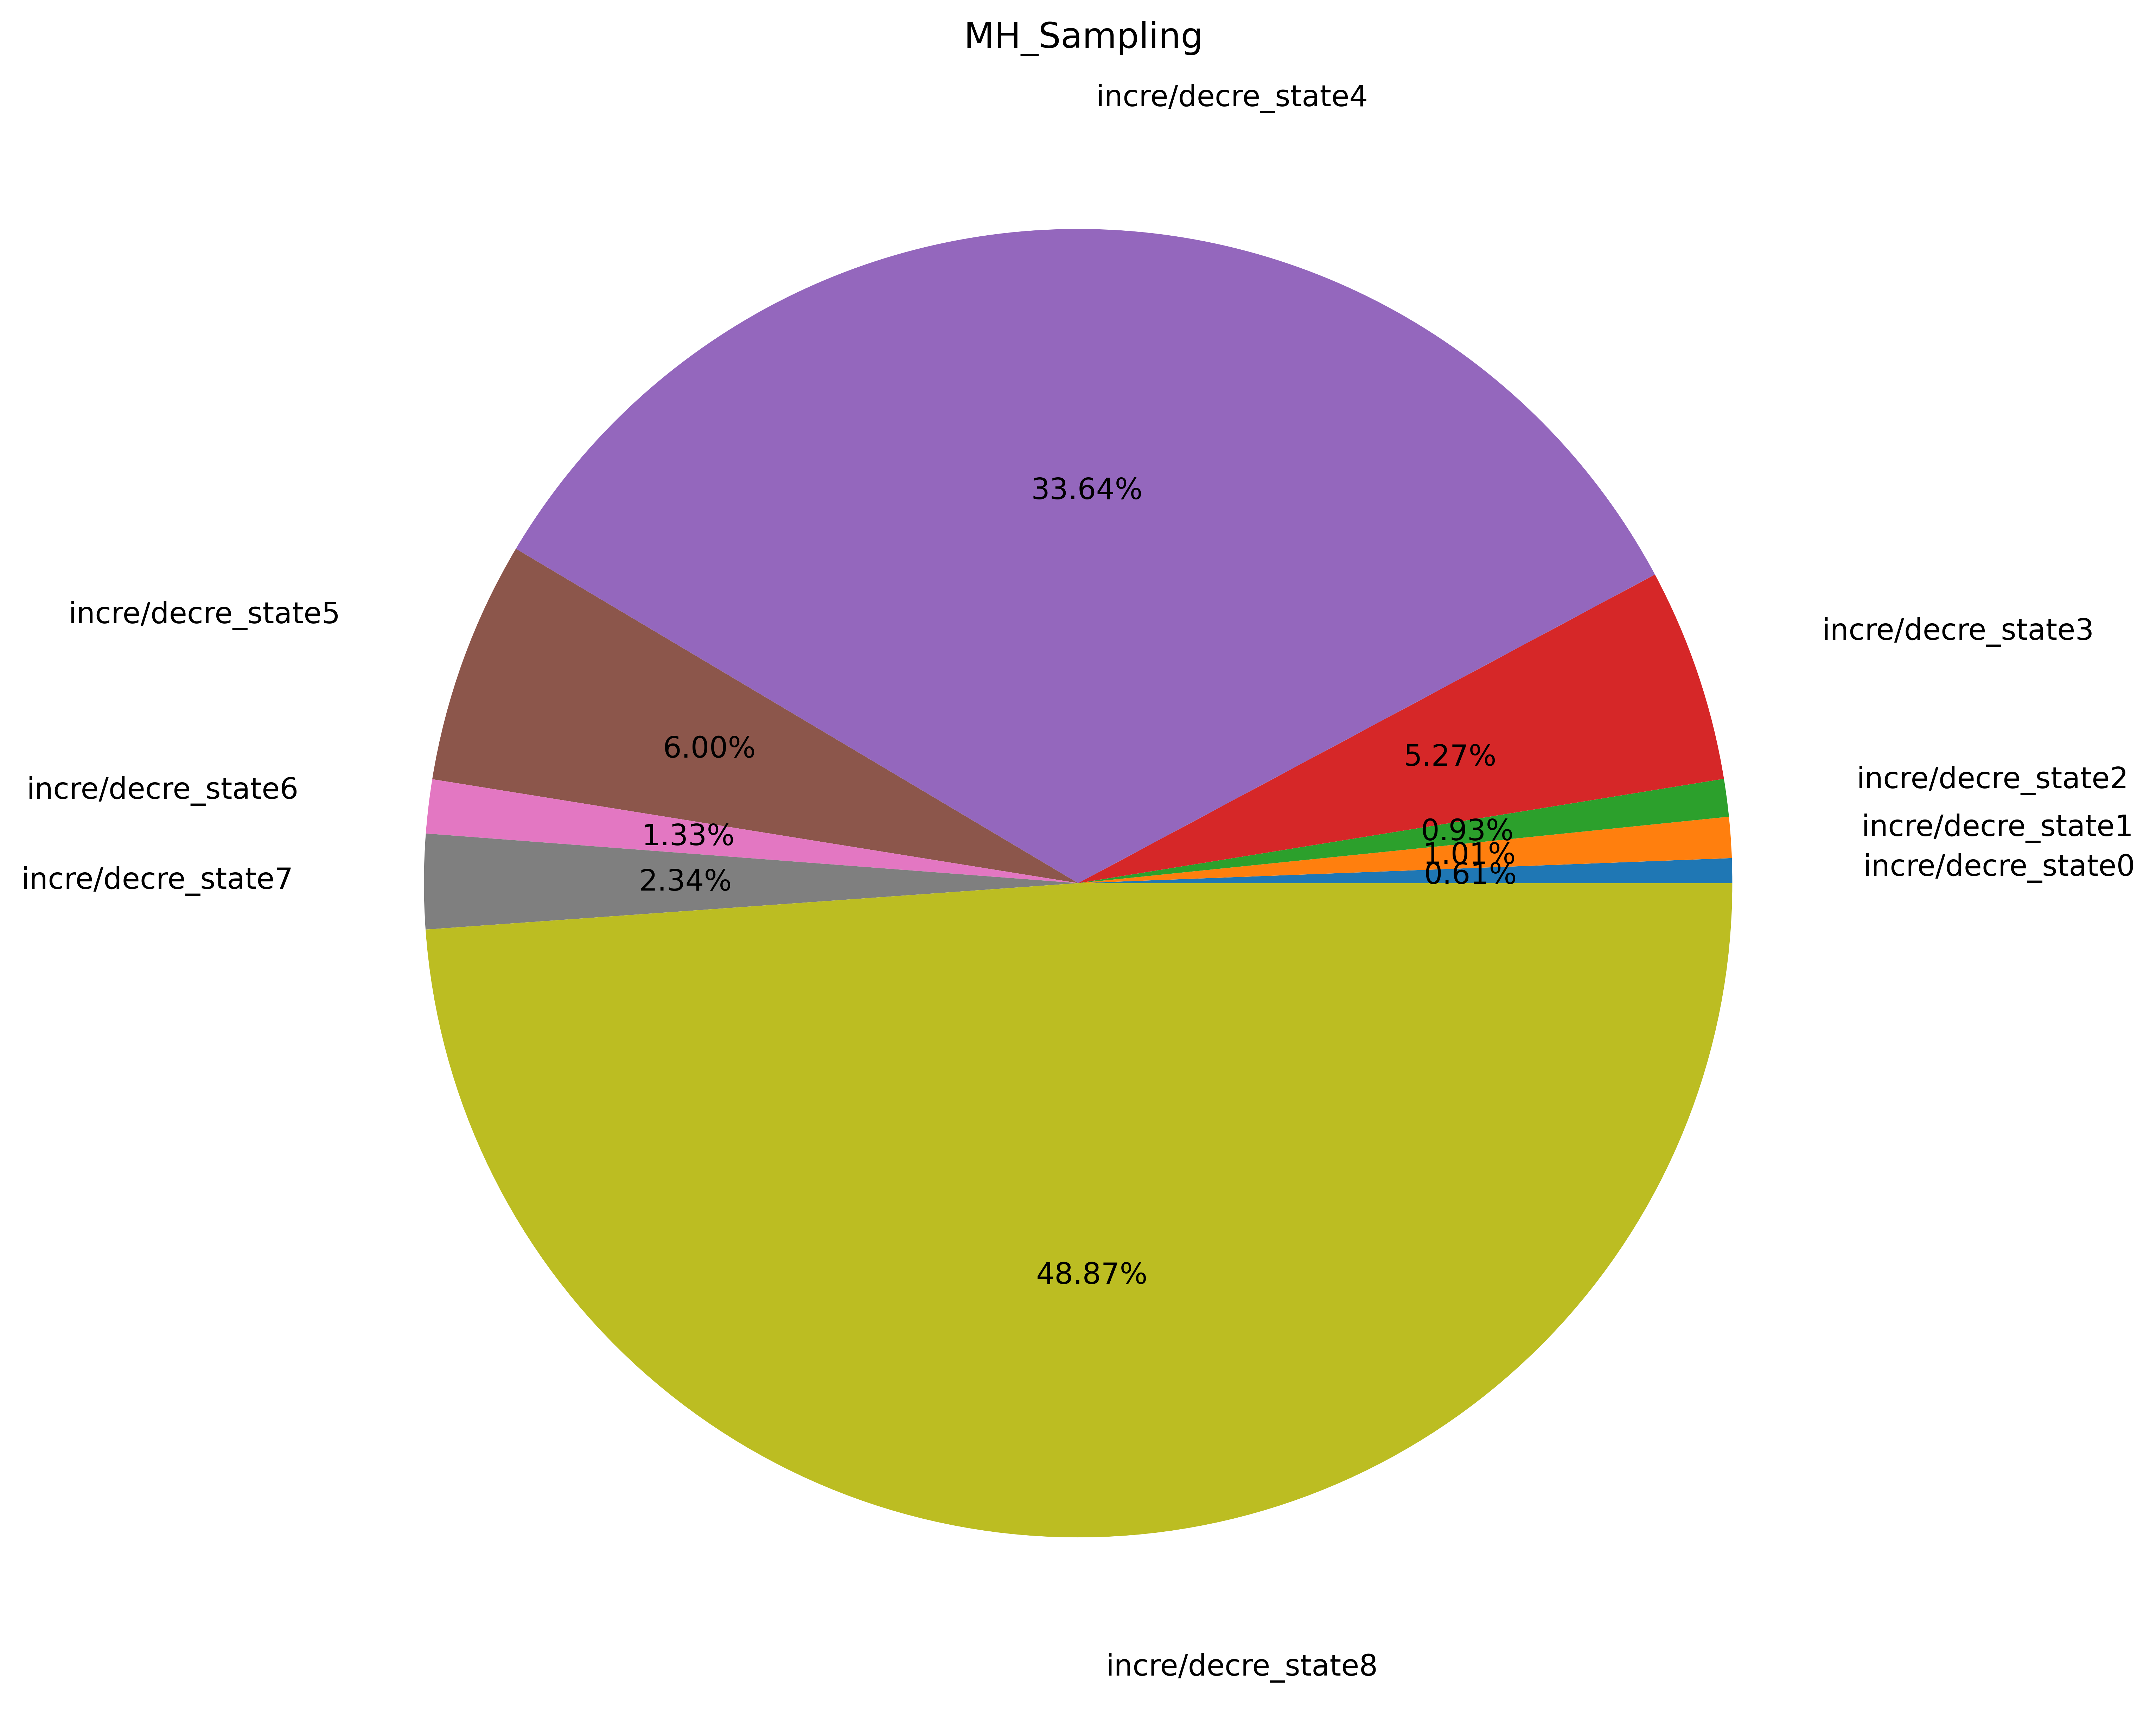

In [3]:
# -*- coding: utf-8 -*-

#p:输入的概率分布，离散情况采用元素为概率值的数组表示
#N:认为迭代N次马尔可夫链收敛
#Nlmax:马尔可夫链收敛后又取的服从p分布的样本数
#isMH:是否采用MH算法，默认为Tru
 
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from array import array
 
def MCMC(p,N=10000,Nlmax=10000,isMH=True):
    
    A = np.array([p for y in range(len(p))], dtype=np.float64) #第一步：构造转移概率矩阵
    X0 = np.random.randint(len(p))
    count = 0
    samplecount = 0
    L = array("d",[X0])
    l = array("d")
    
    while True:
        X = int(L[samplecount])#第二步：初始化x0
        cur = np.argmax(np.random.multinomial(1,A[X]))#第三步：采样候选样本
        count += 1
        if isMH:
            a = (p[cur]*A[cur][X])/(p[X]*A[X][cur])#第四步：计算是否满足马氏平稳条件
            alpha = min(a,1)
        else:
            alpha = p[cur]*A[cur][X]
        u = np.random.uniform(0,1) #第五步：生成阈值
        if u<alpha:#第六步：是否接受样本
            samplecount += 1
            L.append(cur)
            if count>N:
                l.append(cur)
        if len(l)>=Nlmax:
            break
        else:
            continue
    La = np.frombuffer(L)
    la = np.frombuffer(l)
    return La,la
 
def count(q,n):
    L = array("d")
    l1 = array("d")
    l2 = array("d")
    for e in q:
        L.append(e)
    for e in range(n):
        l1.append(L.count(e))
    for e in l1:
        l2.append(e/sum(l1))
    return l1,l2
 
#BOC股票马氏状态的 MH采样概率
if __name__ == '__main__':    
    p = np.array([0.0056,
0.0085,
0.0113,
0.0559,
0.3327,
0.0616,
0.014,
0.0253,
0.014]) 
    plt.figure(figsize=(10, 24), dpi=600)
    a = MCMC(p)[1]
    l1 = ['incre/decre_state%d'% x for x in range(len(p))]
    plt.pie(count(a,len(p))[0],labels=l1,labeldistance=1.2,autopct='%1.2f%%')
    plt.title(" MH_Sampling")
    plt.show()
